In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Examen Modelación Numérica de Sistemas Estocásticos

## Percolación
Analiza la transición de percolación de una red completamente aleatoria. Para formar esta red, primero crea 100 nodos. Luego, de todas las posibles conexiones, elige aleatoriamente una fracción p.
Haz una gráfica del tamaño promedio de los clusters ⟨S⟩ y su varianza σ2 (S).
Estima la fracción crítica con una precisión de ±0.01

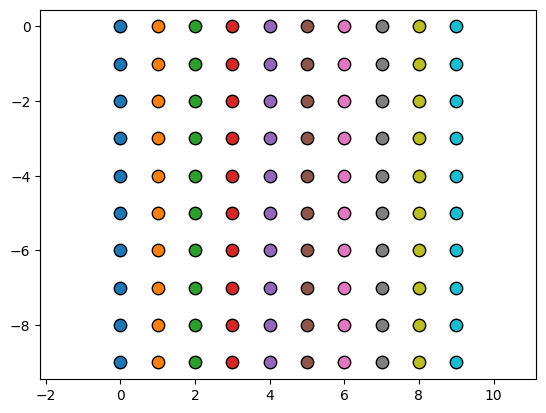

In [2]:
# Crear 100 nodos en una red

def gridGraph(rows, columns):
    positions = []
    for i in range(rows):
        for j in range(columns):
            positions.append((j, -i))

    return positions

rows = 10
columns = 10
positions = gridGraph(rows, columns)
for node in positions:
    plt.scatter(node[0], node[1], edgecolors="black", s=80)

plt.axis("equal")
plt.show()

In [10]:
# Generar matriz de adyacencia en base a fracción f
rng = np.random.default_rng()

def randLink(n, f):
    # Generar Matriz de adyacencia
    adj = np.zeros((n, n))
    # Calcular número de enlaces posibles
    max_links = int(n*(n-1)/2)
    # Del número de enlaces posibles, cuantos formar de acuerdo a f
    n_links = int(np.round(max_links * f))
    # Un ciclo para seleccionar enlaces aleatorios
    idx = np.arange(max_links)
    rng.shuffle(idx)
    links = np.zeros(max_links)
    links[idx[0:n_links]] = 1
    # A partir de los enlaces aleatorios, crear matriz simétrica
    adj[np.triu_indices(n, 1)] = links
    adj = adj + adj.T
    return adj

    

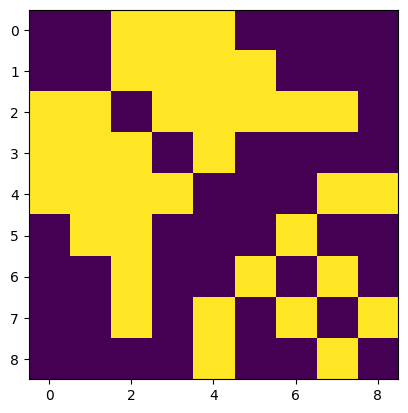

In [34]:
adj = randLink(9, 0.5)
plt.imshow(adj)
plt.show()


In [5]:
# Breadth First Search
# Se buscan nodos con BFS hasta que solo se encuentren repetidos

def findCluster(links, starting_node=0):
    queue = np.nonzero(links[starting_node])[0]
    explored = np.array([starting_node])
    while len(queue) > 0:
        node = queue[0]
        queue = np.delete(queue, 0)
        linked_to = np.nonzero(links[node])[0]
        difference = np.setdiff1d(linked_to, explored, assume_unique=True)
        difference = np.setdiff1d(difference, queue, assume_unique=True)
        queue = np.append(queue, difference)
        if not np.isin(node, explored):
            explored = np.append(explored, node)

    return explored
 
cluster = findCluster(adj)
print(len(cluster))

84


### Gráficas de tamaño y varianza
Tamaño y varianza de los clusters

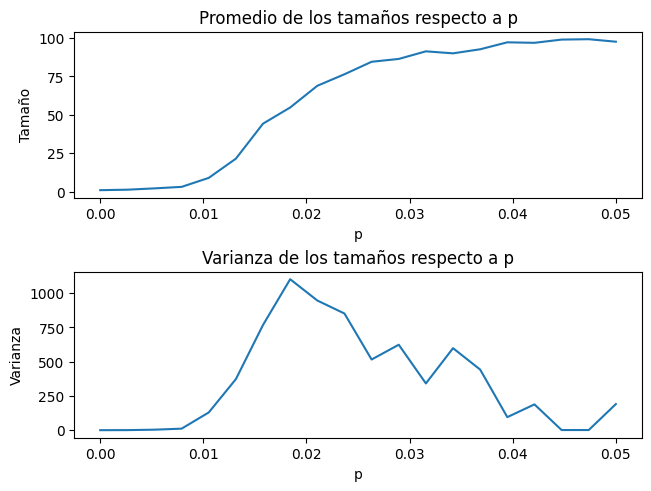

In [58]:
# Exploración

rows = 10
columns = 10
n = rows*columns
f = np.linspace(0, 0.05, 20)
shots = 100

avg = []
var = []

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(len(f)):
    sizes = []
    fi = f[i] # Proporción de enlaces que queremos eliminar
    for j in range(shots):
        adj = randLink(n, fi)

        cluster = findCluster(adj)
        cluster_size = len(cluster)

        sizes.append(cluster_size)

    avg.append(np.mean(sizes))
    var.append(np.var(sizes))


axs[0].plot(f, avg)
axs[0].set_title("Promedio de los tamaños respecto a p")
axs[0].set_xlabel("p")
axs[0].set_ylabel("Tamaño")

axs[1].plot(f, var)
axs[1].set_title("Varianza de los tamaños respecto a p")
axs[1].set_xlabel("p")
axs[1].set_ylabel("Varianza")
plt.show()

### Estimación de la fracción crítica
Se limita el dominio (valores de f) para encontrar con mayor precisión la fracción crítica.

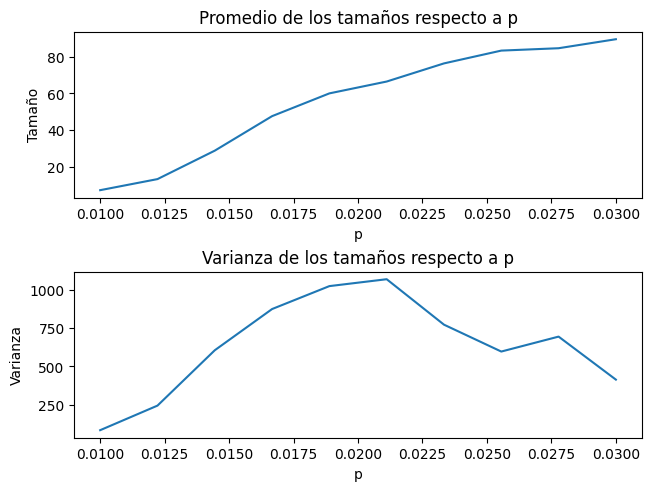

In [59]:
rows = 10
columns = 10
n = rows*columns
f = np.linspace(0.01, 0.03, 10)
shots = 100

avg = []
var = []

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(len(f)):
    sizes = []
    fi = f[i] # Proporción de enlaces que queremos eliminar
    for j in range(shots):
        adj = randLink(n, fi)

        cluster = findCluster(adj)
        cluster_size = len(cluster)

        sizes.append(cluster_size)

    avg.append(np.mean(sizes))
    var.append(np.var(sizes))


axs[0].plot(f, avg)
axs[0].set_title("Promedio de los tamaños respecto a p")
axs[0].set_xlabel("p")
axs[0].set_ylabel("Tamaño")

axs[1].plot(f, var)
axs[1].set_title("Varianza de los tamaños respecto a p")
axs[1].set_xlabel("p")
axs[1].set_ylabel("Varianza")
plt.show()

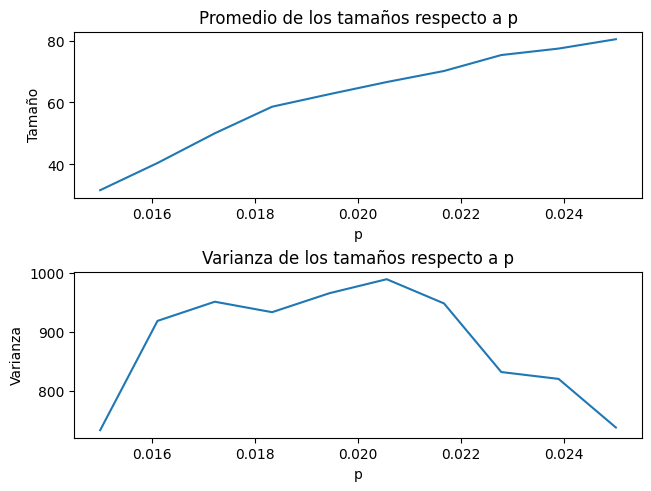

In [60]:
rows = 10
columns = 10
n = rows*columns
f = np.linspace(0.015, 0.025, 10)
shots = 1000

avg = []
var = []

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(len(f)):
    sizes = []
    fi = f[i] # Proporción de enlaces que queremos eliminar
    for j in range(shots):
        adj = randLink(n, fi)

        cluster = findCluster(adj)
        cluster_size = len(cluster)

        sizes.append(cluster_size)

    avg.append(np.mean(sizes))
    var.append(np.var(sizes))


axs[0].plot(f, avg)
axs[0].set_title("Promedio de los tamaños respecto a p")
axs[0].set_xlabel("p")
axs[0].set_ylabel("Tamaño")

axs[1].plot(f, var)
axs[1].set_title("Varianza de los tamaños respecto a p")
axs[1].set_xlabel("p")
axs[1].set_ylabel("Varianza")
plt.show()

Por las gráficas con dominio restringido, se estima que la fracción crítica para este grafo es de $f = 0.02 \pm 0.01$ 

## Reto: Sistemas de EDO
Muchos fenómenos se pueden modelar mediante sistemas de EDO, como lo vimos con el
modelo SIR. Un ejemplo es la dinámica de producción de prote ́ınas. En el modelo más
simple nos interesa saber cómo una concetración de de una proteína cambia dentro de una
célula. La producción de proteínas se lleva a cabo en dos pasos: transcripción y traducción.

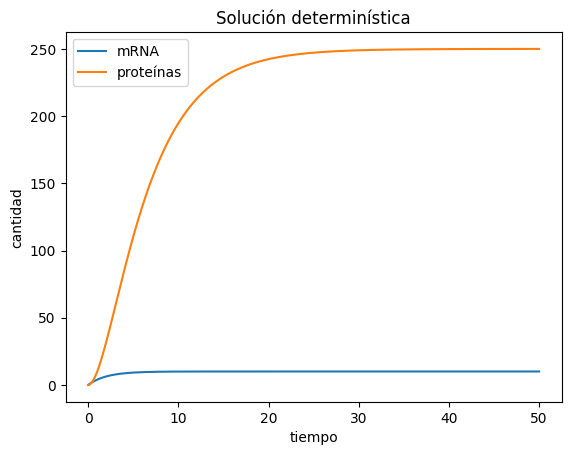

In [61]:
# Resolver de forma determinística
Bm = 5
Bp = 5
Ym = 0.5
Yp = 0.2

n0 = [0, 0]
def f(n, t):
    return [Bm - Ym*n[0], Bp*n[0] - Yp*n[1]]

t = np.linspace(0, 50, 1000)

solv = odeint(f, n0, t)
plt.plot(t, solv[:, 0], label="mRNA")
plt.plot(t, solv[:, 1], label="proteínas")
plt.title("Solución determinística")
plt.xlabel("tiempo")
plt.ylabel("cantidad")
plt.legend()
plt.show()


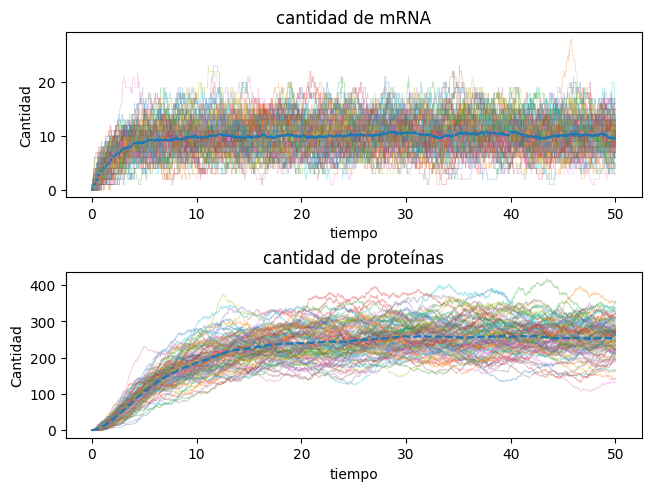

In [65]:
# Como proceso de Poisson
rng = np.random.default_rng()

Bm = 5
Bp = 5
Ym = 0.5
Yp = 0.2

dt = 0.001
tf = 50
iterations = int(np.round(tf / dt))
t_ = np.linspace(0, tf, iterations)

# Categorías
m = np.zeros((iterations, shots))
p = np.zeros((iterations, shots))

m[0] = 0
p[0] = 0

shots = 100 # Número de veces que se hace la simulación

for i in range(iterations-1):
    # Ritmo de procesos aleatorios: La probabilidad es proporcional al dt y al coeficiente (y #I para pI)
    prob_Bm = Bm * dt
    prob_Ym = Ym * m[i, :] * dt
    prob_Bp = Bp * m[i, :] * dt
    prob_Yp = Yp * p[i, :] * dt
    
    # incrementos y decrementos de acuerdo a la probabilidad
    delta_m = np.int64(prob_Bm > rng.random(shots)) - np.int64(prob_Ym > rng.random(shots))
    delta_p = np.int64(prob_Bp > rng.random(shots)) - np.int64(prob_Yp > rng.random(shots))
    
    m[i+1, :] = m[i, :] + delta_m
    p[i+1, :] = p[i, :] + delta_p

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(shots):
    axs[0].plot(t_, m[:, i], alpha=0.3, linewidth=0.6)
    axs[1].plot(t_, p[:, i], alpha=0.3, linewidth=0.6)

m_avg = np.mean(m, axis=1)
p_avg = np.mean(p, axis=1)

axs[0].plot(t_, m_avg, ":")
axs[0].set_title("cantidad de mRNA")
axs[0].set_xlabel("tiempo")
axs[0].set_ylabel("Cantidad")

axs[1].plot(t_, p_avg, "--")
axs[1].set_title("cantidad de proteínas")
axs[1].set_xlabel("tiempo")
axs[1].set_ylabel("Cantidad")
plt.show()

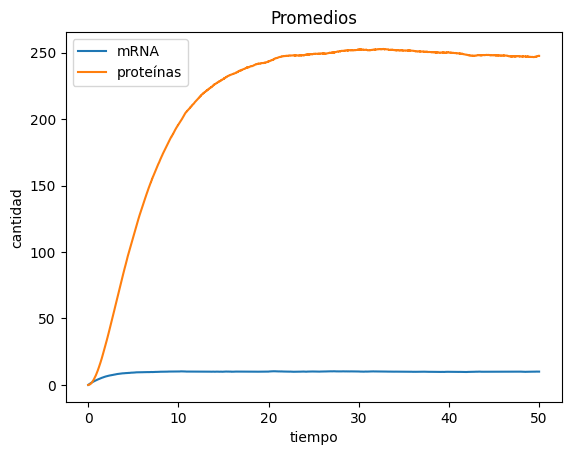

In [63]:
plt.plot(t_, m_avg, label="mRNA")
plt.plot(t_, p_avg, label="proteínas")
plt.title("Promedios")
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("cantidad")
plt.show()